# Выпускной проект: "Выявление профилей покупателей интернет-магазина товаров для дома и быта "Пока все еще тут""

<a id = 'section1'></a>
# Оглавление проекта

<a class="ancor" id="step_0"></a>
* [Описание проекта: цель, задачи, предмет исследования](#step_1)

* [Презентация](#step_2)

* [Дашборд](#step_3)

* [1. Загрузка, первоначальный анализ и предобработка данных](#step_4)
 * [1.1  Выявление и обработка дубликатов](#step_5)
 * [2. Исследовательский анализ данных (EDA)](#step_6)
 * [2.1  Анализ возможности использования деления на категории товаров идентификатора/номера заказа](#step_7)
 * [2.1.1  Удаление скрытых дубликатов](#step_8)
 * [2.1.2  Дополнительная проверка на скрытые дубликаты](#step_19)
 * [2.2  Анализ товарного ассортимента интернет-магазина](#step_9)
 * [2.3  Сегментация покупателей на основе истории их покупок](#step_10)
 * [2.4 Анализ по выручке, количеству покупателей и среднему чеку  для покупателей разных категорий](#step_11)
 * [2.4.1 Для покупателей с количеством товара в заказе до 15](#step_12)
 * [2.4.2 Для оптовых покупателей](#step_13)
* [3. Проверка статистических гипотез](#step_14)
 * [3.1 Гипотеза 1: Среднестатистически средний чек ремонтника-строителя  и  сони не различаются](#step_15)
 * [3.2 Гипотеза 2: Количество товаров в заказе хаусхолдера* и растенелюба** различаются](#step_16)
 * [3.3 Гипотеза 3: Количество товаров в заказе хранителя и домовика не различаются](#step_17)
 * [3.4  Проверка гипотез с поправкой на множественность гипотез](#step_19)
* [Выводы](#step_18)

**Цели работы:** выявление профилей покупателей и полноценный анализ товарного ассортимента интернет магазина товаров для дома и дачи "Пока еще все тут" для увеличения выручки  магазина

Для достижения целей работы необходимо выполнить следующие **задачи**, а именно:
- Провести исследовательский анализ данных
- Сегментировать покупателей на основе истории их покупок
Предпочтительно выдвинуть собственные варианты сегментации покупателей, котораяя может помочь в разработке более персонализированных предложений для покупателей.
Для этого целесообразно проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.
- Сформулировать и проверить статистические гипотезы

**Предмет исследования:** *ecommerce_dataset.csv* - датасет, описывающий транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

**Форма предоставления** 

Проект выполнен в Jupyter Notebook.                                                                               
Программный код представлен в ячейках типа code, текстовые пояснения — в ячейках типа markdown.
В проекте указана  ссылки файла с презентацией в формате pdf и на дашборд на сайте Tableau Public.

<a class="ancor" id="step_1"></a>
# Презентация

https://disk.yandex.ru/i/QanKFcch0CNj4Q

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_2"></a>
# Дашборд

https://public.tableau.com/app/profile/maria6106/viz/Dashbord_n_order_by_day/Dashboard1

https://disk.yandex.ru/d/VmzauyAQyOdcNw

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_3"></a>
## Загрузка датасета, первоначальный анализ и предобработка данных

In [1]:
import pandas as pd
from io import BytesIO
import requests
import datetime

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import re

import scipy.stats as stats
from scipy import stats as st
import numpy as np

from scipy.stats import bartlett
from scipy.stats import levene

from statsmodels.sandbox.stats.multicomp import multipletests

Загружены библиотеки для анализа и визуализации данных

In [2]:
spreadsheet_id = '13FKkbpyir4A4MEKA-ORlp_3UHFE2YnvUjo1OuauXrdQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018100108  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018100108  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018100109  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                             product  quantity  price  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  
2                        Радермахера d-12 см h-20 см         1  112.0  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                     Циперус Зумула d-12 см h-25 см         1  112.0  
5                            Шеффлера Лузеана d-9 см         1  164.0  
6                   Юкка нитчатая d-12 см h-25-35 см         1  134.0  
7    Настенная сушилка для белья Gimi Brio Super 100         1  824.0  
8  Таз пластмассовый 21,0 л круглый "Водолей" С61...         1  269.0  
9  Чехол для гладильной доски Colombo Persia Beig...         1  674.0

Данные считаны, пропусков нет,  наименование колонок корректное, требуется замена типа данных в столбце date, изначально int. Среди товаров - видны комнатные растения, товары для глажки , сушки, стирки.

Даты представлены в канонической форме ггггммддчч (видно из таблицы), уточнено предположение у заказчика. Исследуем все данные до обработки с целью более полного ознакомления и выявления аномалий.

In [3]:
def info(data):

    """
    Функция пробегает по признакам датафрейма и если тип у признака object,\
    то смотрит уникальные значения и статистики, в противном случае 
    оценивает распределение и статистики
    """
    
    for column in data.columns:
    
        if data[column].dtype == 'object':
            
            print(column)
            print(data[column].unique())
            print()
            print(data[column].describe())
            print()
            
            
        else:
            
            print(column)
            print(data[column].describe())
            fig = px.histogram(data, x = column, marginal = 'box', title = 'Распределение '+ column)
            fig.show()
            
info(df)

date
count    6.737000e+03
mean     2.018855e+09
std      3.855185e+05
min      2.018100e+09
25%      2.019020e+09
50%      2.019050e+09
75%      2.019061e+09
max      2.019103e+09
Name: date, dtype: float64


customer_id
['ee47d746-6d2f-4d3c-9622-c31412542920'
 '375e0724-f033-4c76-b579-84969cf38ee2'
 '6644e5b4-9934-4863-9778-aaa125207701' ...
 'f17ed857-178e-45e1-a662-0a9dd3b58c5f'
 '1f0a7f35-7459-4f23-b468-5e45bf481dd1'
 '25df96a7-c453-4708-9cea-a3dfc7c342ea']

count                                     6737
unique                                    2451
top       1d6c8c1f-a799-4418-9af2-1ded47d7a85c
freq                                       888
Name: customer_id, dtype: object

order_id
count     6737.000000
mean     43128.948345
std      27899.414662
min      12624.000000
25%      14827.000000
50%      68503.000000
75%      70504.000000
max      73164.000000
Name: order_id, dtype: float64


product
['Комнатное растение в горшке Алое Вера, d12, h30'
 'Комнатное растение в горшке Кофе Арабика, d12, h25'
 'Радермахера d-12 см h-20 см' ...
 'Сушилка для белья на ванну FREUDENBERG (GIMI) Alablock Varadero silver A4P'
 'Каланхое каландива малиновое d-7 см' 'Литопс Микс d-5 см']

count                                           6737
unique                                          2343
top       Рассада Кабачка сорт Зебра кассета 6 шт E6
freq                                              79
Name: product, dtype: object

quantity
count    6737.000000
mean        2.501559
std        15.266478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64


price
count     6737.000000
mean       462.028499
std        871.296064
min          9.000000
25%        101.000000
50%        135.000000
75%        398.000000
max      14917.000000
Name: price, dtype: float64


Т.к. известно, что даты представлены в канонической форме ггггммддчч - они разделились на 2 гистограммы. Большая часть покупок сделана в 2019 г, рост рост начинается в мае и заканчивается в сентябре. Товары для дома и дачи - предварительно подвержены сезонному фактору.

Уникальных покупателей 2451, есть покупатель  с ИН1d6c8c1f-a799-4418-9af2-1ded47d7a85c, который покупал с частотой 888 (13% от количества заказа, надо посмотреть какая от него выручка, насколько болезненен его уход и есть ли подобные покупатели, может он еще больше покупает такой же ассортимент на стороне, может стоит под него заказывать, дать скидку с целью больше мотивировать на покупки и т.п.). Анализ по выручке мне видится необходимым для выявления постоянных покупателей. 

Индентификатор заказа - строится по схеме есть 12-15 к, пусто и дальше 70 к, можно предположить, что это связано с годом покупки, что маловероятно, возможно  это поможет в категоризации товара (товары определенной категории продаются под другими идентификаторами. Требуется более детальный анализ идентификатора заказа

Уникальных наименований товаров  2343, чаще всего покупали рассаду кабачков, это сезонный продукт, спрос на него будет во 2 половине весны, среди ассортимента есть растения, рассада для выращиваия овощей , посмотреть в целом по растениям, рассаде, может  это выгодно и стоит расширить ассортимент в сезон. Согласуется с увеличением количества заказов по дате. необходимо более подробно посмотреть ассортимент, задействовать разделение его по идентификатору заказа и сортировку по алфавиту.

Количество товара в заказе по наименованию: в среднем 2-3 шт, медиана 1, т.е. большинство покупателей делали покупки количеством товара 1  (по графику не менее 90%), но есть покупатели большого количества товара до 1000 - оптовики.  Можно предположить, что они оказали значительное влияние на выручку за период и могут выделиться в отдельный сегмент покупателей.Целесообразно более пристальн ооценить строки с аномальным количеством покупок(предварительно от 15).

По прайсу разброс цен от 9 до 14917, медиана  135 ,т.е.  покупают преимущественно товары до 200 ( оценивалось исходя из гистограммы), среднее  462, необходим более детальный анализ ассортимента, предварительно можно предположить, что большую часть ассортимента составляют растения, минимум - это скорее всего семена, до 1 квартили -  семена и рассада овощей, далее предметы быта.

Полностью столбцов с уникальными строками нет - **необходима проверка на полные строчные дубликаты**

ВЫВОД

Итак, предварительно можно высказать и необходимо проверить следующие предположения (гипотезы):

1. Первый подход категоризации можно сделать исходя из идентификатора заказа - номера делятся до 20000 и больше 20000, возможно в первой - товары для приусадебного участка, во второй  - товары для дома. Можно будет сегментировать этих покупателей на "дачников" и "домовят". 

2. Одно из  ведущих направлений магазина Продажа растений: среди них есть сезонные (рассада овощей), можно предположить, что  скорее всего выручка магазина и увеличивается в мае-сентябре благодаря продаже растений.

3. Среди покупателей явно есть оптовики по количеству товарной позиции в заказе (количество товарной позиции преимущественно 1 - по гистограмме близко к 90 %) - они требуют детального анализа влияния на размер выручки. Выдвенем гипотезу, что они оказывают существенное влияние на выручку, и, что их можно выделить в отдельный сегмет покупателей (признак : количество покупок выше 15, ориентируясь по стандартному отклонению).

<a class="ancor" id="step_4"></a>
### Выявление полных строчных дубликатов

In [4]:
print('Количество полных строчных дубликатов:', df.duplicated().sum())

Количество полных строчных дубликатов: 0


<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_5"></a>
### Коррекция типа данных

Создаем  отдельный столбец, где дата будет во временном типе данных и удобна для анализа

In [5]:
df[['date_1']] = df[['date']].applymap(str).applymap(lambda s: "{}-{}-{} {}:00:00".format(s[6:8],s[4:6], s[0:4], s[8:]))
df.head()

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0   
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0   
2                        Радермахера d-12 см h-20 см         1  112.0   
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0   
4                     Циперус Зумула d-12 см h-25 см         1  112.0   

                date_1  
0  01-10-2018 00:00:00  
1  01-10-2018 00:00:00  
2  01-10-2018 00:00:00  
3  01-10-2018 00:00:00  
4  01-10-2018 00:00:00

In [6]:
df['date_1'] = pd.to_datetime(df['date_1'], format='%d-%m-%Y %H:%M:%S')
print('Переведено в тип данных:', df['date_1'].dtype)
print('Период:', df['date_1'].min(), '-', df['date_1'].max())

Переведено в тип данных: datetime64[ns]
Период: 2018-10-01 00:00:00 - 2019-10-31 16:00:00


Создан дополнительно   столбец дат с корректым типом данных.  В исследуемом файле данные за 13 месяцев.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_6"></a>
## Исследовательский анализ данных (EDA)

<a class="ancor" id="step_7"></a>
### Анализ возможности  использования деления  на категории товаров  идентификатора/номера заказа

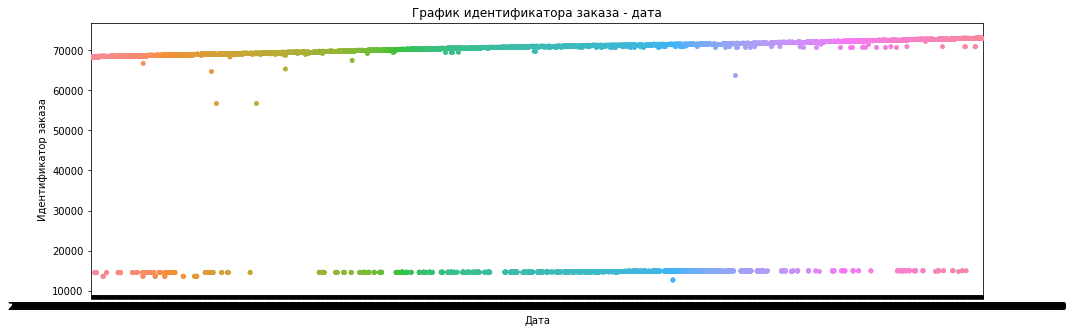

In [7]:
plt.figure(figsize=(16, 5)) 
sns.stripplot(x="date_1", y="order_id", data = df) 
plt.ylabel('Идентификатор заказа')
plt.xlabel('Дата')
plt.title("График идентификатора заказа - дата")
plt.show()

На точечном графике идентификатор заказа- дата видно, что его  деление на группы до 20 000 и больше 20 000 не зависит от даты, но можно предположить, что есть частичные дубликаты, у который одинаковый идентификатор заказа, но разные даты. Проверим это предположение.

In [8]:
#pd.set_option('display.max_rows', None)
df.pivot_table(index =['customer_id', 'order_id','quantity', 'price', 'product'], values='date_1',\
                          aggfunc='count').reset_index().sort_values(by = 'date_1', ascending=False)

customer_id  order_id  quantity  price  \
546   1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833         1  120.0   
542   1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833         1  120.0   
538   1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833         1  120.0   
547   1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833         1  120.0   
545   1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833         1  120.0   
...                                    ...       ...       ...    ...   
1763  5d3d43bd-441e-4e29-9ee3-1f4a4f5a966d     71331         5   59.0   
1764  5d461dd8-56c8-4389-9304-a29c694052d6     69302        16  314.0   
1765  5d4f6a62-578e-4206-badd-e5accb9013e0     72868         1  329.0   
1766  5d566073-92e8-41d1-a2e6-d301ee5ab6d8     69980         1   22.0   
4872  ffe82299-3f5b-4214-87fe-3d36ecccfac3     73060         1  577.0   

                                                product  date_1  
546         Рассада Патиссона сорт Диск, кассета по 6шт      73  
542     Рассада Кабачка сорт Сосновский, кассета по 6шт      73  
538        Рассада Кабачка сорт Белогор кассета 6 шт E6      73  
547    Рассада Патиссона сорт НЛО Белый, кассета по 6шт      73  
545        Рассада Огурца сорт Каролина кассета 6 шт E6      73  
...                                                 ...     ...  
1763     Муляж Перец болгарский желтый 10 см полиуретан       1  
1764  Коврик придверный Attribute NATURE кокосовый 6...       1  
1765                            Мимоза стыдливая d-9 см       1  
1766                  Цветок искусственный Крокус 20 см       1  
4872   Сушилка для белья потолочная Лиана 1,8 м 1703007       1  

[4873 rows x 6 columns]

In [9]:
(df.pivot_table(index =['customer_id', 'order_id','quantity', 'price', 'product'], values='date_1',\
                          aggfunc='count').reset_index())['date_1'].value_counts()

1     4368
2      298
3      110
7       34
4       28
73      12
5        9
6        8
23       1
14       1
10       1
9        1
60       1
8        1
Name: date_1, dtype: int64

In [10]:
df[(df['customer_id'] == '1d6c8c1f-a799-4418-9af2-1ded47d7a85c')]['product'].value_counts()

Рассада Кабачка сорт Горный, кассета по 6шт                             74
Рассада Патиссона сорт НЛО Белый, кассета по 6шт                        74
Рассада Огурца сорт Каролина кассета 6 шт E6                            74
Рассада Кабачка сорт Сосновский, кассета по 6шт                         74
Рассада Огурец Фараон ячейки по 6 шт Е6                                 74
Рассада Кабачка сорт Зебра кассета 6 шт E6                              74
Рассада Кабачка сорт Белогор кассета 6 шт E6                            74
Рассада Патиссона сорт Диск, кассета по 6шт                             74
Рассада Кабачка сорт Аэронавт, кассета по 6шт                           74
Рассада Кабачка сорт Золотинка кассета 6 шт E6                          74
Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    74
Рассада Огурец Кристина ячейки по 6 шт Е6                               74
Name: product, dtype: int64

Получается, что порядка 2369 строк датасета содержат частичные повторы, среди них постоянный покупатель ИН1d6c8c1f-a799-4418-9af2-1ded47d7a85c, чаще всего покупающий на фоне одиночников - 888 строк. Это может влиять на анализ выручки  по категориям товаров и сегментацию товаров по количеству и другому признаку (цене, продукту) и исказить выводы.

Заказчик подтвердил наличие скрытых дубликатов. 
Необходимо удалить повторяющиеся строки и далее проводить анализ и сегментацию по очищенному от скрытых дубликатов  датасету.

<a class="ancor" id="step_8"></a>
#### Удаление скрытых дубликатов 

In [11]:
df = df.drop_duplicates(subset=['customer_id', 'order_id','quantity', 'price', 'product'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 6735
Data columns (total 7 columns):
date           4873 non-null int64
customer_id    4873 non-null object
order_id       4873 non-null int64
product        4873 non-null object
quantity       4873 non-null int64
price          4873 non-null float64
date_1         4873 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 304.6+ KB


In [12]:
pd.set_option('display.max_rows', 10)
display(df.pivot_table(index =['customer_id', 'order_id','quantity', 'price', 'product'], values='date_1',\
        aggfunc='count').reset_index().sort_values(by = 'date_1', ascending=False))

customer_id  order_id  quantity  price  \
0     000d6849-084e-4d9f-ac03-37174eaf60c4     14943         1  135.0   
3246  b0f2c3e6-0879-4a3e-b68c-983cc1d335f5     69725         2  359.0   
3253  b1603989-dd5b-4fcb-a0ce-1e2cd985d2a0     68601         1  314.0   
3252  b1603989-dd5b-4fcb-a0ce-1e2cd985d2a0     68601         1  149.0   
3251  b15b220e-395a-4b57-980c-0f16fd2e6bbb     14868         1  112.0   
...                                    ...       ...       ...    ...   
1624  552e17df-ba16-4e66-84fb-55a5557a6bea     68643         3  172.0   
1623  552e17df-ba16-4e66-84fb-55a5557a6bea     68544         4  202.0   
1622  552e17df-ba16-4e66-84fb-55a5557a6bea     68544         4  142.0   
1621  552e17df-ba16-4e66-84fb-55a5557a6bea     68544         3  187.0   
4872  ffe82299-3f5b-4214-87fe-3d36ecccfac3     73060         1  577.0   

                                                product  date_1  
0     Пеларгония розебудная Queen Ingrid укорененный...       1  
3246  Скатерть виниловая тисненая с ажурной каймой 1...       1  
3253             Кампанула махровая двухцветная d-10 см       1  
3252                        Пеларгония душистая d-13 см       1  
3251  Пеларгония Toscana Angeleyes Amarillo Burgundy...       1  
...                                                 ...     ...  
1624   Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042       1  
1623  Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...       1  
1622  Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attrib...       1  
1621  Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...       1  
4872   Сушилка для белья потолочная Лиана 1,8 м 1703007       1  

[4873 rows x 6 columns]

Скрытые дубликаты, различающиеся  по дате и одинаковые по номеру заказа, удалены, далее исследования будут вестись по очищенному датасету

<a class="ancor" id="step_19"></a>
#### Дополнительная проверка на скрытые дубликаты 

In [13]:
#pd.set_option('display.max_rows', None)
df.pivot_table(index =['order_id','product', 'quantity', 'price'], values='customer_id',\
  aggfunc='count').reset_index().sort_values(by = 'customer_id', ascending=False)

order_id                                            product  quantity  \
4666     72845               Муляж Яблоко зеленый 9 см полиуретан        40   
3967     71480  Мята перечная Шоколадная Chocolate d-7 см h-10...         1   
2937     69485  Набор столовых приборов 24 предмета FARANDOLE ...         1   
4323     72188               Муляж Персики мини полиуретан d-6 см         1   
3760     71054  Вешалка-плечики без эссенции цвет тёмно-розовы...        10   
...        ...                                                ...       ...   
1611     14848  Роза садовая чайногибридная в горшке Черри Бренди         1   
1610     14848  Роза садовая чайногибридная в горшке Роза Биг ...         1   
1609     14848         Роза садовая чайногибридная в горшке Лимбо         1   
1608     14848        Роза садовая чайногибридная в горшке Дежавю         1   
4839     73164  Таз пластмассовый со стиральной доской (Иж), 1...         1   

       price  customer_id  
4666    59.0            4  
3967    74.0            3  
2937  1274.0            2  
4323    22.0            2  
3760    43.0            2  
...      ...          ...  
1611   188.0            1  
1610   188.0            1  
1609   188.0            1  
1608   188.0            1  
4839   397.0            1  

[4840 rows x 5 columns]

In [14]:
df[df['order_id']==69485]

date                           customer_id  order_id  \
1282  2018122016  5be0f4b4-947f-4672-b147-73ef5936ecd4     69485   
1292  2018122111  266beb08-ec9b-43b4-89bb-ac60fa23ffee     69485   
1384  2018122623  e0461045-4fcc-4731-8837-509f6534512a     69485   

                                                product  quantity   price  \
1282  Набор столовых приборов 24 предмета SAINT GERM...         1  1087.0   
1292  Набор столовых приборов 24 предмета FARANDOLE ...         1  1274.0   
1384  Набор столовых приборов 24 предмета FARANDOLE ...         1  1274.0   

                  date_1  
1282 2018-12-20 16:00:00  
1292 2018-12-21 11:00:00  
1384 2018-12-26 23:00:00

Следует обратить внимание на то, что есть совпадения по номеру заказа у разных пользователей

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_9"></a>
### Анализ товарного ассортимента интернет-магазина

In [15]:
df[df['order_id']<20000]['order_id'].max()

14946

уточнение максимального значения для идентификатора заказа до 20000

In [16]:
sorted(df[df['order_id']<=14946]['product'].unique())

['Агератум рассада однолетних цветов в кассете по 10 шт',
 'Аквилегия махровая Тауэр смесь окрасок объем 1 л',
 'Аквилегия обыкновенная Барлоу микс объем 1 л',
 'Алиссум (лобулярия) Снежные одежды 0,2 г 4650091480302',
 'Алиссум Скальный желтый объем 1 л',
 'Алиссум рассада однолетних цветов в кассете по 10 шт',
 'Алиссум рассада однолетних цветов в кассете по 6 шт',
 'Анемона белый объем 0,5 л',
 'Арбуз Волгоградец Р-9',
 'Арбуз Огонек раннеспелый d-7 см',
 'Арбуз Сибирские огни раннеспелый d-7 см',
 'Арбуз Холодок позднеспелая d-7 см',
 'Арбуз Шуга Бейби раннеспелый d-7 см',
 'Аргирантерум рассада однолетних цветов в горшке диам. 12 см',
 'Астра альпийская микс объем 1 л',
 'Астра рассада однолетних цветов в кассете по 10 шт',
 'Астра рассада однолетних цветов в кассете по 6 шт',
 'Бадан Сердцелистный Красная звезда красный объем 1 л',
 'Базилик Застольный 0,3 г 4660010775419',
 'Базилик Овощной Арарат d-7 см',
 'Базилик Пурпурные Звезды d-7 см',
 'Базилик Смесь зеленого и фиолетовог

при осмотре ассортимента товаров по алфавиту, идентификаторы товаров у которых ниже 14946 (уточнено максимальное значение) видно, что в списке растения. Обращает на себя внимание, что много цветов, рассады, помидоров/томатов. В формировании названий товаров присутствуют г, D, d-, H, h-, P-, л, штуки/шт/штук, в горшке, кашпо, кассетаб ячейки по, см, №. Не видно саженцев/посадочного материала по плодово-ягодным деревьям и кустарникам (например, яблоня, дерево груша, слива, смородина, крыжовник, абрикос, вишня), деревьям для украшения участка, (например, сосна, туя, рябина) необходима консультация специалиста для оптимизации ассортимента.

Можно выдвинуть предположение, что в предложенниях магазина нет плодово-ягодных и декоративных деревьев и кустарников, и расширением этих товаров может увеличить выручку магазина, по крайней мере, в посадочный сезон.

Количество уникальных товаров 689
Прайс: 9.0 - 600.0


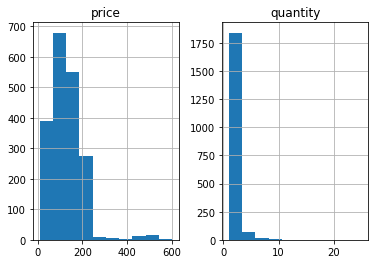

In [17]:
print('Количество уникальных товаров', df[df['order_id']<=14946]['product'].nunique())
print('Прайс:', df[df['order_id']<=14946]['price'].min(), '-', df[df['order_id']<=14946]['price'].max())
df.drop(['date', 'order_id'], axis=1)[df['order_id']<=14946].hist()
plt.show()

Прайс: максимум соизмерим со средним значением, минимум - это скорее всего семена или 1 шт рассады овощной. Можно предположить, что больше всего покупают рассады овощей.Семян или в ассортименте мало, или  покупатели больше ориентированы на рассаду, что подороже, растения выше 250 покупали значительно реже.
Оптовиков с идентификаторами заказов ниже 1496 нет. 

In [18]:
sorted(df[df['order_id']>14946]['product'].unique())#, reverse=True)

['Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759',
 'Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776',
 'Tepмокружка AVEX Recharge 500 мл голубой AVEX0681',
 'Ёрш бутылочный с металлической ручкой малый Y64 1807002',
 'Ёрш для бутылки из натурального волокна и металла 23 см кремовый, Burstenmann, 0473/0003',
 'Ёрш радиаторный без ручки 1807007',
 'Ёрш унитазный пластмассовый, Ваир 1712002',
 'Ёрш унитазный с деревянной ручкой , Ваир 1712012',
 'Ёрш унитазный с подставкой WC "Люкс", Мультипласт, 1712007',
 'Ёрш унитазный с подставкой WC "Стандарт", Мультипласт 1712010',
 'Автоматическая щетка Leifheit для мытья окон с ручкой 43 см. 51114',
 'Адиантум Лиза d-12 см',
 'Азалия Индика Биколор d-12 см h-20',
 'Азалия Индика розовая d-12 см h-20',
 'Азалия Индика фиолетовая d-10 см h-20',
 'Азалия индика Биколор d-12 см',
 'Алоэ Вера d-12 см h-25 см',
 'Альбука Спиралис Фризл-Сизл d-12 см',
 'Амариллис Red Lion темно-красный в горшке d-12 см 1 луковица',
 'Антижир POSH ONE MAGNUM 828 мл Ро

при осмотре ассортимента товаров по алфавиту, идентификаторы товаров у которых выше 14946 (уточнено максимальное значение) видно, что в списке тоже есть растения(рассады нет, скорее-комнатные растения), товары для быта/дома( посуда, текстиль, ковры/коврики, мебель, товары для организации хранения/мебель, искусственные имитации плодов , ягод и цветов, для глажки (большой ассортимент), для сушки белья и стирки, бытовая химия и аксесуары для уборки), отдельно выделяются сумки/тележки, лестницы/стремянки. Сумки-тележки и лестницы-стремянки - это  товары, которые люди покупают для себя и крайне редко, также как гладильные доски, сушки для белья.

Количество уникальных товаров 1665
Прайс: 14.0 - 14917.0


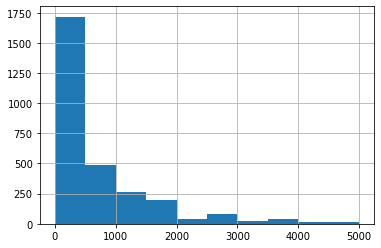

Количество в заказе: 1 - 1000


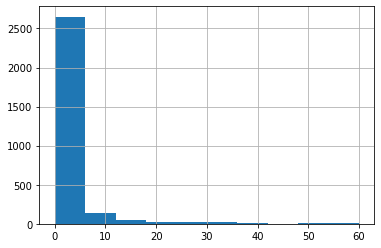

In [19]:
print('Количество уникальных товаров', df[df['order_id']>14946]['product'].nunique())
print('Прайс:', df[df['order_id']>14946]['price'].min(), '-', df[df['order_id']>14946]['price'].max())
df[df['order_id']>14946]['price'].hist(range=(0,5000))
plt.show()
print('Количество в заказе:', df[df['order_id']>14946]['quantity'].min(), '-', df[df['order_id']>14946]['quantity'].max())
df[df['order_id']>14946]['quantity'].hist(range=(0,60))
plt.show()

Ассортиментных позиций под идентификационными номерами больше почти на 1000. Среди покупателей есть оптовики - это те, у кого количество покупок ориентировочно больше 12 , точно больше 45, т.е.  это можно классифицировать, как супероптовики. 

Покупают товары  из этого ассортимента большей частью стоимостью до 2000. 

In [20]:
for i in df[df['order_id']>14946]['product'].unique():
     if i in df[df['order_id']<=14946]['product'].unique():
             print(i)

Пеларгония розебудная Red Pandora укорененный черенок
Пеларгония розебудная Queen Ingrid укорененный черенок
Пеларгония розебудная Mary укорененный черенок
Пеларгония розебудная Margaretha укорененный черенок
Пеларгония Toscana Angeleyes Bicolor укорененный черенок
Пеларгония розебудная Prins Nikolai укорененный черенок
Пеларгония зональная Мультиблум Скарлет Ай d-7 см h-10 см укорененный черенок
Базилик Овощной Арарат d-7 см
Базилик зеленый Тонус d-7 см
Базилик Пурпурные Звезды d-7 см
Пеларгония Angeleyes Orange укорененный черенок


Совпадений по  обоим группам по ассортименту немного - это все растения, котрые можно выращивать как дома, так и на приусадебном участке.

Добавим столбец по выручке и месяцу, посмотрим зависимости и соотношения.

In [21]:
df['revenue'] = df['price']*df['quantity']
df['month_year'] = df['date_1'].dt.to_period('M')
df.head()

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0   
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0   
2                        Радермахера d-12 см h-20 см         1  112.0   
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0   
4                     Циперус Зумула d-12 см h-25 см         1  112.0   

      date_1  revenue month_year  
0 2018-10-01    142.0    2018-10  
1 2018-10-01    194.0    2018-10  
2 2018-10-01    112.0    2018-10  
3 2018-10-01    179.0    2018-10  
4 2018-10-01    112.0    2018-10

Выручка за период:  4142154.0
Средняя выручка за месяц за период:  318627.2
Доля выручки за период для товаров c идентификатором заказов до 14946, %:  7.8


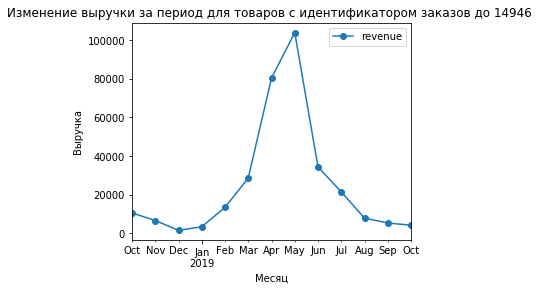

Доля выручки за период для товаров c идентификатором заказов после 14946, %:  92.2


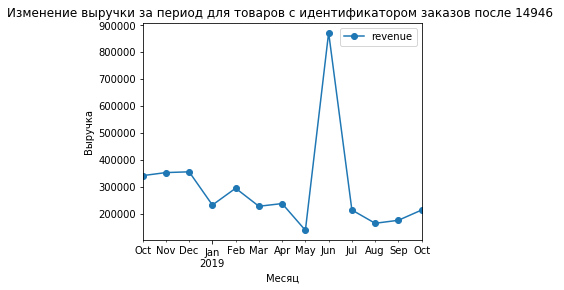

In [22]:
print("Выручка за период: ", df['revenue'].sum())
print("Средняя выручка за месяц за период: ", (df['revenue'].sum() / 13).round(1))

print("Доля выручки за период для товаров c идентификатором заказов до 14946, %: ",\
      (df[df['order_id']<=14946]['revenue'].sum() / df['revenue'].sum()*100).round(1))

df[df['order_id']<=14946].pivot_table(index = 'month_year', values = 'revenue' , aggfunc = 'sum')\
.plot(style='o-', figsize=(5,4))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Изменение выручки за период для товаров c идентификатором заказов до 14946 ")
plt.show()  

print("Доля выручки за период для товаров c идентификатором заказов после 14946, %: ",\
      (df[df['order_id']>14946]['revenue'].sum() / df['revenue'].sum()*100).round(1))

df[df['order_id']>14946].pivot_table(index = 'month_year', values = 'revenue' , aggfunc = 'sum')\
.plot(style='o-', figsize=(5,4))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Изменение выручки за период для товаров c идентификатором заказов после 14946 ")
plt.show()  

Из графика выручки для товаров с индификатором  до 1496 видно, что выручка в мае достигает своего максимума (увеличивается в 5 раз), что визуально и логически еще раз подтверждает предположение  о сезонности товара из этой группы товара. Для покупателей с ИН заказа после 1496 наибольший прирост по выручке на величину порядка 600 тыс наблюдается в июне,что значительно выше выручки в среднем, такой прирост могла дать оптовая продажа товара, учитывая прайс. 

In [23]:
df.sort_values(by='revenue', ascending = False)

date                           customer_id  order_id  \
5456  2019061815  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
5071  2019061107  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
1518  2019011513  58a4c3cc-504f-43ea-a74a-bae19e665552     69830   
1299  2018122116  6987e6d6-a63a-4ce2-a2d0-f424092d235e     69504   
1023  2018112917  8fba3604-ef57-4b9f-b2fe-3402fa8825c8     69156   
...          ...                                   ...       ...   
977   2018112514  52aff75c-a972-4c25-bad5-dfe6a48cd981     14512   
979   2018112514  52aff75c-a972-4c25-bad5-dfe6a48cd981     14512   
2159  2019030415  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   
5642  2019070322  1ec1ad59-a29b-4949-929d-f4fc4fe14758     14887   
1078  2018120311  2c8b9386-2e8c-4ee9-8aa4-2b4875b68578     14514   

                                                product  quantity   price  \
5456  Вантуз с деревянной ручкой d14 см красный, Bur...      1000   675.0   
5071   Вешалки мягкие для деликатных вещей 3 шт шоколад       334   148.0   
1518  Простынь вафельная 200х180 см WELLNESS RW180-0...        27  1755.0   
1299  Тележка багажная DELTA ТБР-22 синий грузоподъе...        57   574.0   
1023      Набор ножей Attribute CHEF 5 предметов AKF522        64   457.0   
...                                                 ...       ...     ...   
977          Морковь Детская сладость 2 г 4660010775921         1    10.0   
979               Огурец Засолочный 0,3 г 4660010776102         1    10.0   
2159                Горох Амброзия 10,0 г 4660010772616         1     9.0   
5642  Алиссум (лобулярия) Снежные одежды 0,2 г 46500...         1     9.0   
1078   Львиный зев Волшебный ковер 0,05 г 4660010779639         1     9.0   

                  date_1   revenue month_year  
5456 2019-06-18 15:00:00  675000.0    2019-06  
5071 2019-06-11 07:00:00   49432.0    2019-06  
1518 2019-01-15 13:00:00   47385.0    2019-01  
1299 2018-12-21 16:00:00   32718.0    2018-12  
1023 2018-11-29 17:00:00   29248.0    2018-11  
...                  ...       ...        ...  
977  2018-11-25 14:00:00      10.0    2018-11  
979  2018-11-25 14:00:00      10.0    2018-11  
2159 2019-03-04 15:00:00       9.0    2019-03  
5642 2019-07-03 22:00:00       9.0    2019-07  
1078 2018-12-03 11:00:00       9.0    2018-12  

[4873 rows x 9 columns]

Действительно, можно увидеть, что было 2 оптовые продажи c номерами заказов 71743 и 71668.

In [24]:
df[(df['order_id']==71743)|(df['order_id']==71668)]

date                           customer_id  order_id  \
5071  2019061107  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
5456  2019061815  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                product  quantity  price  \
5071   Вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0   
5456  Вантуз с деревянной ручкой d14 см красный, Bur...      1000  675.0   

                  date_1   revenue month_year  
5071 2019-06-11 07:00:00   49432.0    2019-06  
5456 2019-06-18 15:00:00  675000.0    2019-06

In [25]:
(df[(df['order_id']==71743)|(df['order_id']==71668)]['revenue'].sum() / df['revenue'].sum()*100).round()

17.0

Выручка за 2 этих заказа  - 17% (!) от общей выручки за период. 

In [26]:
df.sort_values(by='quantity', ascending = False)

date                           customer_id  order_id  \
5456  2019061815  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
5071  2019061107  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
3961  2019052021  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
1158  2018121014  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
568   2018110108  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
...          ...                                   ...       ...   
2107  2019030114  9650580f-4b5d-43a9-b93f-8598337d2948     14555   
2108  2019030114  9650580f-4b5d-43a9-b93f-8598337d2948     14555   
2109  2019030114  9650580f-4b5d-43a9-b93f-8598337d2948     14555   
2110  2019030114  9650580f-4b5d-43a9-b93f-8598337d2948     14555   
6735  2019103114  73d1cd35-5e5f-4629-8cf2-3fda829d4e58     73164   

                                                product  quantity  price  \
5456  Вантуз с деревянной ручкой d14 см красный, Bur...      1000  675.0   
5071   Вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0   
3961                          Муляж ЯБЛОКО 9 см красное       300   51.0   
1158      Ручка-скоба РС-100 белая *Трибатрон*, 1108035       200   29.0   
568                           Муляж ЯБЛОКО 9 см красное       170   51.0   
...                                                 ...       ...    ...   
2107  Пеларгония розебудная Margaretha укорененный ч...         1  135.0   
2108     Пеларгония розебудная Mary укорененный черенок         1  135.0   
2109  Пеларгония розебудная Prins Nikolai укорененны...         1  135.0   
2110  Пеларгония розебудная Queen Ingrid укорененный...         1  135.0   
6735  Таз пластмассовый со стиральной доской (Иж), 1...         1  397.0   

                  date_1   revenue month_year  
5456 2019-06-18 15:00:00  675000.0    2019-06  
5071 2019-06-11 07:00:00   49432.0    2019-06  
3961 2019-05-20 21:00:00   15300.0    2019-05  
1158 2018-12-10 14:00:00    5800.0    2018-12  
568  2018-11-01 08:00:00    8670.0    2018-11  
...                  ...       ...        ...  
2107 2019-03-01 14:00:00     135.0    2019-03  
2108 2019-03-01 14:00:00     135.0    2019-03  
2109 2019-03-01 14:00:00     135.0    2019-03  
2110 2019-03-01 14:00:00     135.0    2019-03  
6735 2019-10-31 14:00:00     397.0    2019-10  

[4873 rows x 9 columns]

In [27]:
print('Доля выручки оптовиков(количество товара больше 15), %:', \
                        (df[df['quantity']>15]['revenue'].sum() / df['revenue'].sum()*100).round())
display(df[df['quantity']>15]['price'].describe())
display(df[df['quantity']>15]['revenue'].describe())
print('Список товаров, которые заинтересовали оптовиков')
sorted(df[df['quantity']>15]['product'].unique())

Доля выручки оптовиков(количество товара больше 15), %: 27.0


count     105.000000
mean      110.942857
std       201.883193
min        19.000000
25%        34.000000
50%        57.000000
75%        83.000000
max      1755.000000
Name: price, dtype: float64

count       105.000000
mean      10643.733333
std       65916.173101
min         320.000000
25%        1247.000000
50%        2120.000000
75%        3776.000000
max      675000.000000
Name: revenue, dtype: float64

Список товаров, которые заинтересовали оптовиков


['Ёрш унитазный с деревянной ручкой , Ваир 1712012',
 'Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000',
 'Ведро резинопластиковое строительное 12,0 л (МП), 1402018',
 'Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204',
 'Вешалка Valiant для брюк и юбок металлическая 30*10.5 см 121B11',
 'Вешалка деревянная для верхней одежды 45 см',
 'Вешалка для блузок 41 см зеленый Attribute AHM751',
 'Вешалка для костюма прямая 44 см красное дерево Attribute AHR141',
 'Вешалка-плечики без эссенции цвет тёмно-розовый FWM-002/Quartz pink',
 'Вешалки мягкие для деликатных вещей 3 шт шоколад',
 'Гвоздика стандартная Белая 60 см Колумбия Плантация Geoflora S.A.S. 25 штук в упаковке',
 'Гвоздика стандартная Новия 70 см Колумбия Плантация Turflor S.A.S 25 штук в упаковке',
 'Декоративная композиция искуственных цветов Букет Роз три цветка, цвет в ассортименте 105 см',
 'Завертка форточная белая/антик с полимерным покрытием *Тонар*, 1108287',
 'Искусственный цветок Подснежн

Обратим внимание, что оптовики выбрали товара за период на 28% (из них, конечно, 17% выбрали гипероптовики по вантузам и вешалкам) - более 1/4 от всего объема выручки.В списке товаров обращает на себя внимание интерес к искусственным  и живым цветам, товарам для уборки, крепежным изделиям, посуде). Видится, что удачный ассортимент и ценовая политика могут привлечь еще большее количество покупателей с таким  оптовым "поведением", и тем самым повысить выручку магазина. Оптовики, как правило, не берут товары из верхнего ценового сегмента, они берут расходники, то, что выгодно было по цене по их мнению, видимо, товары  очень длительного, из рубрики "покупаем раз в жизни" (стремянки, гладильные доски) не привлекают оптовиков. Но количеством (объемом)они набирают  в сумме сопоставимой с частниками, покупающими "крупняк". Повторные покупки оптовиков однозначно сохранят и преумножат выручку.

Покупателей с количеством заказов от 15 и выше следует выделить в отдельный сегмент (профиль) - оптовики. Привлечение оптовиков и мотивирование их на повторные покупки - одна из возможных стратегий повышения выручки магазина.

<a class="ancor" id="step_10"></a>
### Сегментация покупателей на основе истории их покупок

Получается, что все товары магазина можно разделить на категории по месту применения: растения (для дачи)- цветоводы-огородники и товары для быта и дома (дом)- домовята, хаусхолдеры во всем спектре применения (уборщики, прачечники,  выпадают из этого сумки-тележки -грузоперевозчики, возможно, стремянки -ремонтники-строители (для стройки). 

Из товаров  для дома можно отдельно выделить в категории/подкатегории: для ухода за бельем ( для стирки, глажки, сушки), для ванны и туалета, для украшения жилья (дизайн), для хранения, для уборки, попробовать  категорию спальня, остальное все в категорию 'дом' (там много слов).

Учитывая относительно небольшое количество ассортиментных позиций и размера датасета(но большое количество пролатинских названий (что характерно для растений) - но даст большое количество основ слов при лемматизации или разделении названий по словам при помощи split), наличие характерных комбинаций в названиях растений, а также  бытовое понимание (пользуемся этим постоянно) товаров для дома  и возможность отделить сразу порядка 700 наименований в категорию растения было принято категоризацию делать "полуручным" методом

Для осуществления этого имеет смыл написать функцию, при помощи которой в отдельный столбец будут записаны категории, по идентификатору заказа (номера заказов до 1496 - растения) - растения дача, по слову/части слова по смыслу, по наличию в названии (г, D, d-, H, h-, P-, л, штуки/шт/штук, в горшке, кашпо, кассетаб ячейки по, см)/сочетанию их, используя регулярные выражения - что позволит выделить растения из товарных позиций с идентификатором заказа более 1496 и нсазвать категорию: растения дача.

Для упрощения задачи разделения и проверки на корректность отнесения к категории использовался коды ниже(закомментированы). 

In [29]:
#for i in df['product'].unique():
#    if "Сушилка" in i:
#        print(i)

In [30]:
#for i in df[df['order_id']>15000]['product'].unique():
#    if re.findall(r'скус', i):
#        print(i)

In [31]:
#df[(df['quantity']<15)&(df['category'] == 'хранение')].sort_values(by='price', ascending=False)

In [28]:
    """
    Функция возвращает  название категории по названию товара в зависимости от идентификационного номера\
    и наличия слова/части слова или комбинации символов
    """
def category(product):

        if product in  df[df['order_id']<15000]['product'].unique():  
            return 'растение дача' 
        elif re.findall(r'ерань', product):
            return 'растение дом'
        elif re.findall(r'еларгон', product):
            return 'растение дом'
        elif re.findall(r'азили', product):
            return 'растение дом'
        elif re.findall(r'айник', product):
            return 'дом'
        elif re.findall(r'уляж', product):
            return 'дизайн'
        elif re.findall(r'Чайник', product):
            return 'дизайн'
        elif re.findall(r'd-[0-9]+ см', product):
            return 'растение дом'
        elif re.findall(r'Щетк', product):
            return 'уборка' 
        elif re.findall(r'скус', product):
            return 'дизайн' 
        elif re.findall(r'скус', product):
            return 'дизайн' 
        elif re.findall(r'ладил', product):
            return 'глажка, сушка, стирка'
        elif re.findall(r'ушил', product):
            return 'глажка, сушка, стирка' 
        elif re.findall(r'тюг', product):
            return 'глажка, сушка, стирка'
        elif re.findall(r'умк', product):
            return 'сумка'
        elif re.findall(r'ележк', product):
            return 'сумка' 
        elif re.findall(r'естни', product):
            return 'лестница'
        elif re.findall(r'ремянк', product):
            return 'лестница'  
        elif re.findall(r'отора', product):
            return 'дизайн'
        elif re.findall(r'рючок', product):
            return 'хранение'
        elif re.findall(r'антуз', product):
            return 'ванна и туалет' 
        elif re.findall(r'ванн', product):
            return 'ванна и туалет'
        elif re.findall(r'для туалет', product):
            return 'ванна и туалет'
        elif re.findall(r'для чист', product):
            return 'уборка'
        elif re.findall(r'для удален', product):
            return 'уборка'
        elif re.findall(r'рищепк', product):
            return 'глажка, сушка, стирка' 
        elif re.findall(r'ылесос', product):
            return 'уборка'
        elif re.findall(r'ойк', product):
            return 'уборка'
        elif re.findall(r'ыть', product):
            return 'уборка'
        elif re.findall(r'еник', product):
            return 'уборка'
        elif re.findall(r'вабр', product):
            return 'уборка'
        elif re.findall(r'стирк', product):
            return 'глажка, сушка, стирка'
        elif re.findall(r'був', product):
            return 'хранение'
        elif re.findall(r'ешал', product):
            return 'хранение'
        elif re.findall(r'лечик', product):
            return 'хранение'
        elif re.findall(r'Полк', product):
            return 'хранение'
        elif re.findall(r'для бель', product):
            return 'глажка, сушка, стирка' 
        elif re.findall(r'хранен', product):
            return 'хранение'       
        elif re.findall(r'ростын', product):
            return 'спальня'
        elif re.findall(r'ахров', product):
            return 'ванна и туалет'
        elif re.findall(r'окрывал', product):
            return 'спальня'
        elif re.findall(r'одушк', product):
            return 'спальня'
        elif re.findall(r'деял', product):
            return 'спальня'
        elif re.findall(r'лед', product):
            return 'спальня'
        elif re.findall(r'оволоч', product):
            return 'спальня'
        elif re.findall(r'матр', product):
            return 'спальня'
        elif re.findall(r'-моп', product):
            return 'уборка'
        elif re.findall(r'ороб', product):
            return 'хранение'
        elif re.findall(r'овер', product):
            return 'спальня'
        elif re.findall(r'оврик', product):
            return 'ванна и туалет'
        elif re.findall(r'h-[0-9]+ см', product):
            return 'растение дом'
        elif re.findall(r'штук', product):
            return 'растение дом'
        elif re.findall(r'аста', product):
            return 'ванна и туалет'
        elif re.findall(r'ашпо', product):
            return 'растение дом'
        elif re.findall(r'унитаз', product):
            return 'ванна и туалет'
        elif re.findall(r'ехол', product):
            return 'хранение'
        elif re.findall(r'Крюч', product):
            return 'хранение'
        elif re.findall(r'омнатно', product):
            return 'растение дом'
        elif re.findall(r'ветущ', product):
            return 'растение дом'
        else:
            return 'дом'
df['category'] = df['product'].apply(category)
df.head()

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0   
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0   
2                        Радермахера d-12 см h-20 см         1  112.0   
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0   
4                     Циперус Зумула d-12 см h-25 см         1  112.0   

      date_1  revenue month_year      category  
0 2018-10-01    142.0    2018-10  растение дом  
1 2018-10-01    194.0    2018-10  растение дом  
2 2018-10-01    112.0    2018-10  растение дом  
3 2018-10-01    179.0    2018-10  растение дом  
4 2018-10-01    112.0    2018-10  растение дом

In [32]:
(df.groupby('customer_id')['category'].nunique().reset_index().rename(columns={'category': 'category_count'}))\
['category_count'].value_counts()

1     2372
2       61
3       11
5        3
11       1
10       1
6        1
4        1
Name: category_count, dtype: int64

Получается, что 2372/2451 * 100% = 97% пользователей - это монокатегористы - покупают товары только из одной категории. **Имеет смысл далее сегментировать, анализировать и выявлять закономерности по всем покупателям в разрезе категорий товаров**, соотнося это с областью применения товара и объемом выручки. 

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_11"></a>
### Анализ по выручке, количеству покупателей и среднему чеку  для покупателей разных  товарных категорий

In [33]:
print('Уникальные покупатели:', df['customer_id'].nunique())
print('Уникальные заказы:', df.pivot_table(index=['date_1','order_id'])['revenue'].count())
print('Доля повторных покупок:', (1-df['customer_id'].nunique()/\
df.pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))

print()

for i in df['category'].unique():
    print(i)
    print('Уникальные покупатели:', df[(df['category']==i)]['customer_id'].nunique())
    print('Уникальные заказы:', df[(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count())
    print('Доля повторных покупок:', (1-df[(df['category']==i)]['customer_id'].nunique()/\
    df[(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))
    print()

Уникальные покупатели: 2451
Уникальные заказы: 2839
Доля повторных покупок: 0.14

растение дом
Уникальные покупатели: 323
Уникальные заказы: 361
Доля повторных покупок: 0.11

глажка, сушка, стирка
Уникальные покупатели: 433
Уникальные заказы: 501
Доля повторных покупок: 0.14

дом
Уникальные покупатели: 466
Уникальные заказы: 522
Доля повторных покупок: 0.11

хранение
Уникальные покупатели: 141
Уникальные заказы: 148
Доля повторных покупок: 0.05

сумка
Уникальные покупатели: 304
Уникальные заказы: 346
Доля повторных покупок: 0.12

растение дача
Уникальные покупатели: 346
Уникальные заказы: 403
Доля повторных покупок: 0.14

дизайн
Уникальные покупатели: 186
Уникальные заказы: 208
Доля повторных покупок: 0.11

уборка
Уникальные покупатели: 62
Уникальные заказы: 69
Доля повторных покупок: 0.1

ванна и туалет
Уникальные покупатели: 243
Уникальные заказы: 272
Доля повторных покупок: 0.11

спальня
Уникальные покупатели: 25
Уникальные заказы: 28
Доля повторных покупок: 0.11

лестница
Уникальны

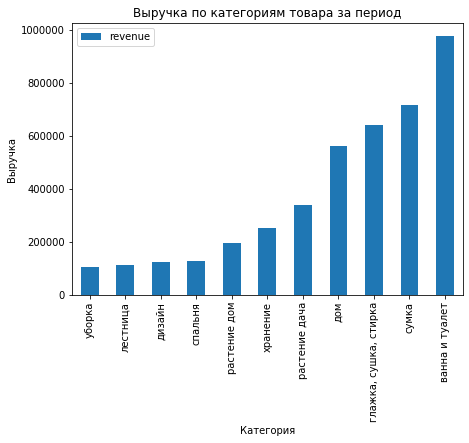

In [34]:
df.pivot_table(index='category', values='revenue', aggfunc = 'sum')\
.reset_index().rename(columns={'revenue': 'revenue'}). sort_values(by='revenue')\
.plot(kind='bar', x= 'category', y = 'revenue', style='o-', figsize=(7,5))
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.title("Выручка по категориям товара за период")
plt.show()

<a class="ancor" id="step_12"></a>
#### Для покупателей с количеством товара  в заказе до 15

In [35]:
print('Уникальные покупатели:', df[df['quantity']<15]['customer_id'].nunique())
print('Уникальные заказы:', df[df['quantity']<15].pivot_table(index=['date_1','order_id'])['revenue'].count())
print('Доля повторных покупок:', (1-df[df['quantity']<15]['customer_id'].nunique()/\
df[df['quantity']<15].pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))

print()

for i in df['category'].unique():
    print(i)
    print('Уникальные покупатели:', df[(df['quantity']<15)&(df['category']==i)]['customer_id'].nunique())
    print('Уникальные заказы:', df[(df['quantity']<15)&(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count())
    print('Доля повторных покупок:', (1-df[(df['quantity']<15)&(df['category']==i)]['customer_id'].nunique()/\
    df[(df['quantity']<15)&(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))
    print()

Уникальные покупатели: 2353
Уникальные заказы: 2724
Доля повторных покупок: 0.14

растение дом
Уникальные покупатели: 316
Уникальные заказы: 354
Доля повторных покупок: 0.11

глажка, сушка, стирка
Уникальные покупатели: 433
Уникальные заказы: 501
Доля повторных покупок: 0.14

дом
Уникальные покупатели: 442
Уникальные заказы: 494
Доля повторных покупок: 0.11

хранение
Уникальные покупатели: 126
Уникальные заказы: 131
Доля повторных покупок: 0.04

сумка
Уникальные покупатели: 303
Уникальные заказы: 345
Доля повторных покупок: 0.12

растение дача
Уникальные покупатели: 344
Уникальные заказы: 401
Доля повторных покупок: 0.14

дизайн
Уникальные покупатели: 152
Уникальные заказы: 169
Доля повторных покупок: 0.1

уборка
Уникальные покупатели: 56
Уникальные заказы: 60
Доля повторных покупок: 0.07

ванна и туалет
Уникальные покупатели: 232
Уникальные заказы: 260
Доля повторных покупок: 0.11

спальня
Уникальные покупатели: 25
Уникальные заказы: 27
Доля повторных покупок: 0.07

лестница
Уникальны

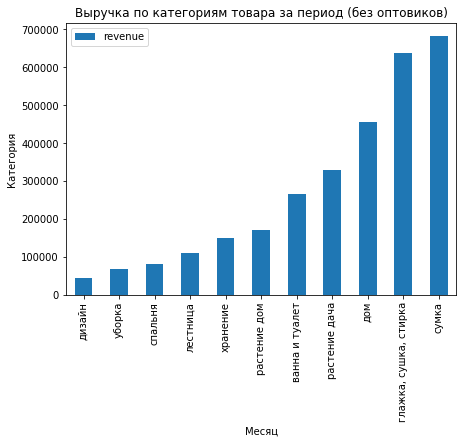

Характеристики  по выручке , количеству уникальных товаров, цене и количеству товарных позиций по категориям (количество товара  менее 15)


revenue product  price                                \
                            sum nunique    min      max         mean  median   
category                                                                       
ванна и туалет         265800.0     194   15.0   5474.0   775.780919   600.0   
глажка, сушка, стирка  638225.0     261   59.0  14917.0  1159.671845   697.0   
дизайн                  43505.0     125   20.0    674.0    70.125506    52.0   
дом                    454898.0     461   19.0   7349.0   510.951220   225.0   
лестница               110692.0      36  638.0   7724.0  2315.276596  1874.0   
...                         ...     ...    ...      ...          ...     ...   
растение дом           170046.0     228   29.0   3599.0   276.869180   149.0   
спальня                 80183.0      28  202.0   6134.0  1600.464286  1116.0   
сумка                  683466.0     109   37.0   8737.0  1940.819484  1087.0   
уборка                  67646.0      52   38.0   7229.0   956.738462   450.0   
хранение               149852.0     105   15.0   4312.0   673.733333   262.0   

                      quantity                       
                           min max      mean median  
category                                             
ванна и туалет               1  10  1.505300      1  
глажка, сушка, стирка        1  10  1.137864      1  
дизайн                       1  14  3.283401      2  
дом                          1  14  2.151568      1  
лестница                     1   2  1.021277      1  
...                        ...  ..       ...    ...  
растение дом                 1  13  1.472284      1  
спальня                      1  12  1.964286      1  
сумка                        1   4  1.025788      1  
уборка                       1  10  1.353846      1  
хранение                     1  12  2.466667      1  

[11 rows x 10 columns]

In [36]:
df[df['quantity']<15]\
.pivot_table(index='category', values='revenue', aggfunc = 'sum')\
.reset_index().rename(columns={'revenue': 'revenue'}). sort_values(by='revenue')\
.plot(kind='bar', x= 'category', y = 'revenue', style='o-', figsize=(7,5))
plt.xlabel('Месяц')
plt.ylabel('Категория')
plt.title("Выручка по категориям товара за период (без оптовиков)")
plt.show()

print('Характеристики  по выручке , количеству уникальных товаров, цене и количеству товарных \
позиций по категориям (количество товара  менее 15)')
df[df['quantity']<15].groupby('category') \
.agg({'revenue': 'sum', 'product': 'nunique', 'price':['min', 'max', 'mean', 'median'], \
                            'quantity':['min', 'max', 'mean', 'median']})

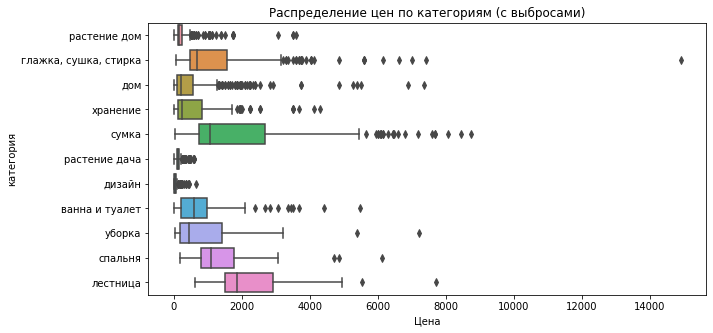

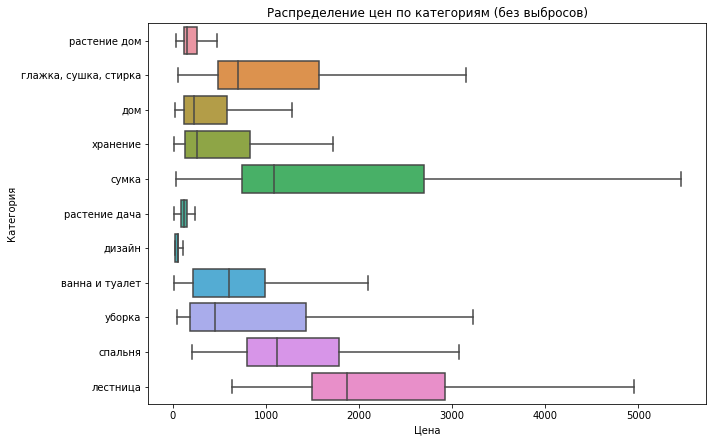

In [37]:
plt.figure(figsize=(10, 5)) 
sns.boxplot(x="price", y="category", data=df[df['quantity']<15])#, showfliers=False) 
plt.title("Распределение цен по категориям (с выбросами)")
plt.ylabel('категория')
plt.xlabel('Цена')

plt.show()

plt.figure(figsize=(10, 7)) 
sns.boxplot(x="price", y="category", data=df[df['quantity']<15], showfliers=False) 
plt.title("Распределение цен по категориям (без выбросов)")
plt.ylabel('Категория')
plt.xlabel('Цена')

plt.show()

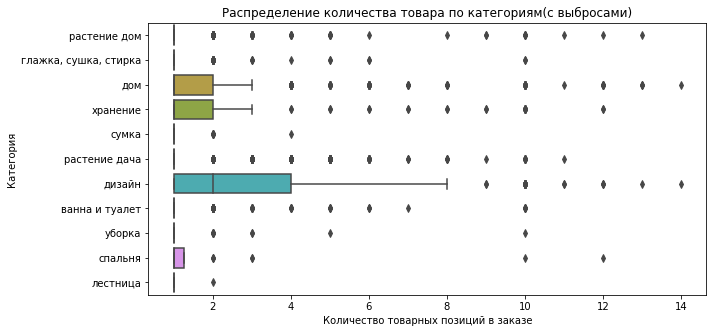

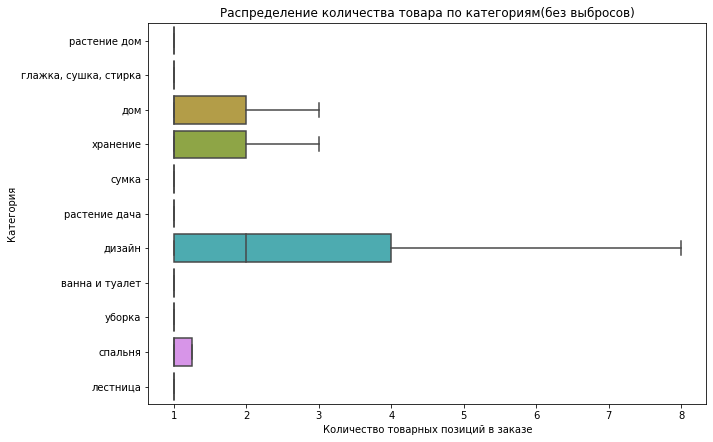

In [38]:
plt.figure(figsize=(10, 5)) 
sns.boxplot(x="quantity", y="category", data=df[df['quantity']<15])#, showfliers=False) 
plt.title("Распределение количества товара по категориям(с выбросами)")
plt.ylabel('Категория')
plt.xlabel('Количество товарных позиций в заказе')

plt.show()

plt.figure(figsize=(10, 7)) 
sns.boxplot(x="quantity", y="category", data=df[df['quantity']<15], showfliers=False) 
plt.title("Распределение количества товара по категориям(без выбросов)")
plt.ylabel('Категория')
plt.xlabel('Количество товарных позиций в заказе')

plt.show()

Обращает на себя внимание, что без покупателей, которые покупали менее 15 товаров по количеству, наибольшие по выручке сегменты - это  "глажка, сушка, стирка" и "сумка".

Из таблицы получается, что по медианному значению  количество  товара в заказе по всем категориям, кроме дизайна равно 1, можно предположить, что растенелюбы и  наусхолдеры (исключая дизайнеров)  заказывают одинаковое количество товара в среднем. Из диаграмм размаха по количеству видно, у хаусхолдеров домовята и хранители заказывают в среднем по 2 товара, что в целом увеличивает разброс количества товарных позиций у хаусхолдеров и увеличивает вероятность того, что их средний чек будет различаться. Необходима проверка гипотез:
- Количество товаровных позиций в заказе хаусхолдера и растенелюба различаются.
- Количество товарных позиций в заказе хранителя и домовика не различаются.


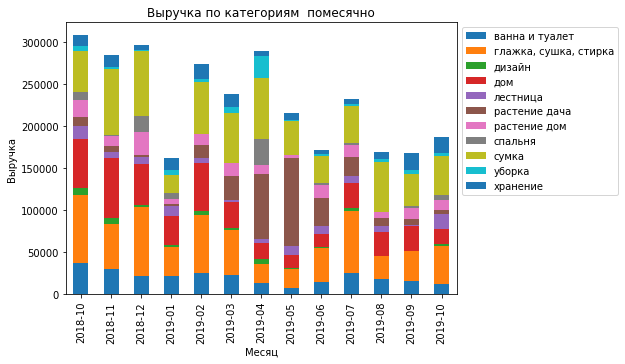

In [39]:
df[df['quantity']<15].pivot_table(index='month_year',columns ='category',\
                    values='revenue', aggfunc='sum').plot(kind='bar', figsize=(7,5), stacked = True)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Выручка по категориям  помесячно")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

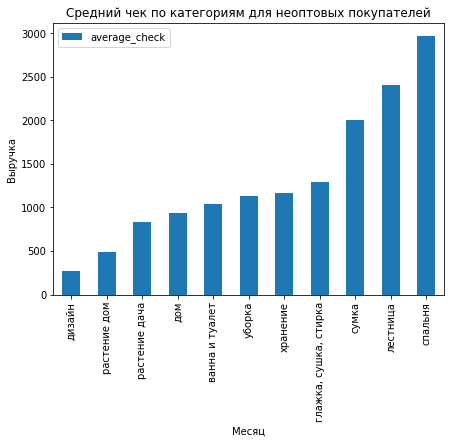

category  revenue_category  n_order  n_customer  \
0          ванна и туалет          265800.0      256         232   
1   глажка, сушка, стирка          638225.0      493         433   
2                  дизайн           43505.0      163         152   
3                     дом          454898.0      486         442   
4                лестница          110692.0       46          44   
..                    ...               ...      ...         ...   
6            растение дом          170046.0      348         316   
7                 спальня           80183.0       27          25   
8                   сумка          683466.0      342         303   
9                  уборка           67646.0       60          56   
10               хранение          149852.0      129         126   

    average_check  revenue_per_user  %revenue_per_user_average_check  
0     1038.281250       1145.689655                         0.103448  
1     1294.574037       1473.960739                         0.138568  
2      266.901840        286.217105                         0.072368  
3      936.004115       1029.180995                         0.099548  
4     2406.347826       2515.727273                         0.045455  
..            ...               ...                              ...  
6      488.637931        538.120253                         0.101266  
7     2969.740741       3207.320000                         0.080000  
8     1998.438596       2255.663366                         0.128713  
9     1127.433333       1207.964286                         0.071429  
10    1161.643411       1189.301587                         0.023810  

[11 rows x 7 columns]

In [40]:
df_category_neopt = df[(df['quantity']<15)].groupby(['category'])\
.agg({'revenue':'sum','order_id':'nunique', 'customer_id' : 'nunique'})\
.reset_index().rename(columns={'revenue': 'revenue_category', 'order_id': 'n_order','customer_id':'n_customer'})
df_category_neopt['average_check'] = df_category_neopt['revenue_category'] / df_category_neopt['n_order']
df_category_neopt['revenue_per_user'] = df_category_neopt['revenue_category'] / df_category_neopt['n_customer']
df_category_neopt['%revenue_per_user_average_check'] = df_category_neopt['revenue_per_user']/df_category_neopt['average_check']-1
df_category_neopt.sort_values(by='average_check')\
.plot(x= 'category', y='average_check', kind = 'bar', figsize = (7,5))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Средний чек по категориям для неоптовых покупателей")
plt.show() 
df_category_neopt

На графике четко видно, что дачники "делают" выручку в апреле-мае, а грузоперевозки на протяжении всего года вносят весомый вклад в общую выручку за месяц, без прачечников и домовят выручка сильно упадет в непосадочный сезон, а ремонтники-строители активизируется в ноябре-феврале и мае-августе и вносят на лестницах-стремянках свою лепту в общее дело. В общем,  товары разных категорий примения гармонично дополняли друг друга, давали ресурсы к росту выручки и , главное, не давали ей упасть в ноль за исследуемый период. Настораживает тот факт, что выручка ноября 2019 года снизилась на 1/3 по сравнению с выручкой ноября 2018. 

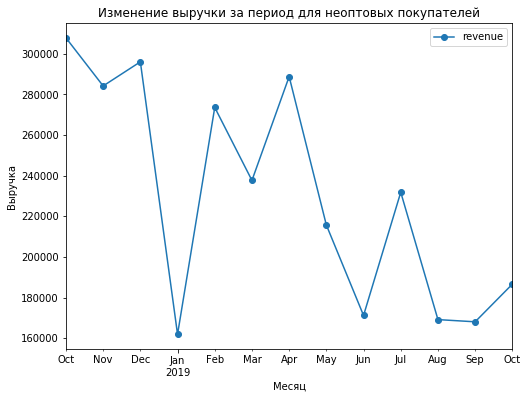

In [41]:
df[df['quantity']<15].pivot_table(index='month_year', values='revenue', aggfunc = 'sum').plot(style='o-', figsize=(8,6))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Изменение выручки за период для неоптовых покупателей")
plt.show()  

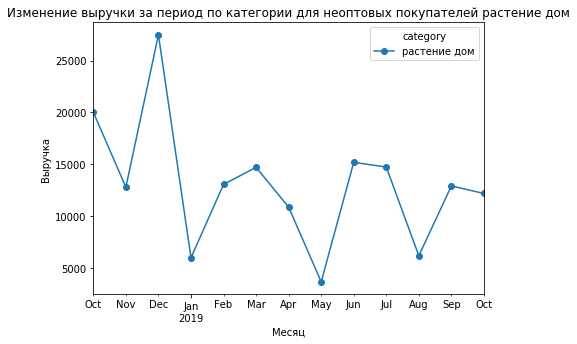

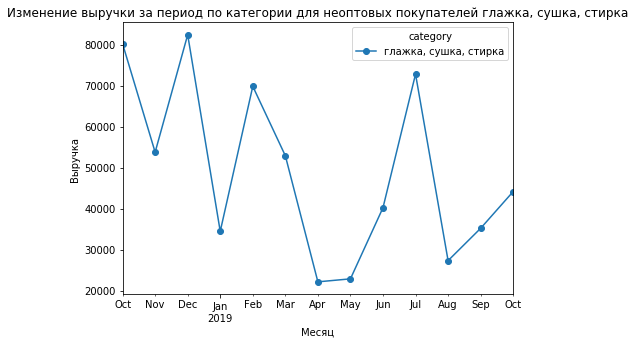

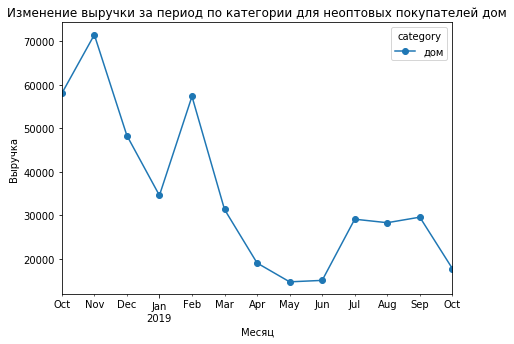

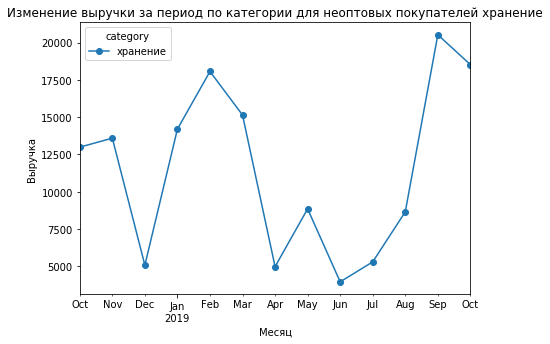

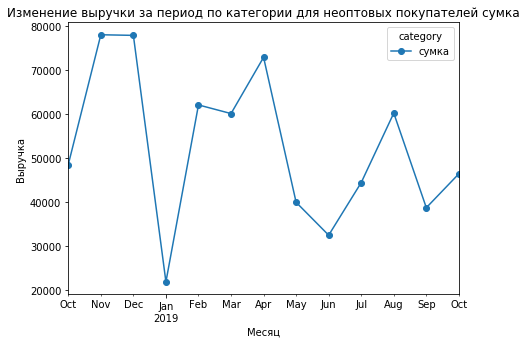

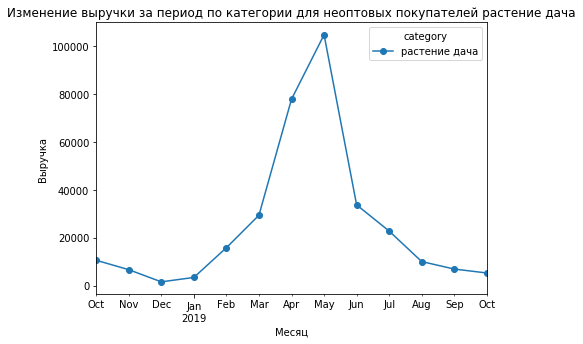

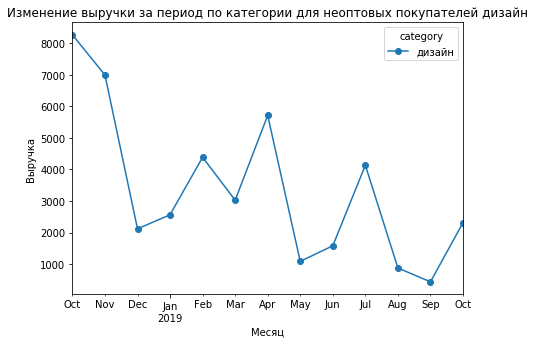

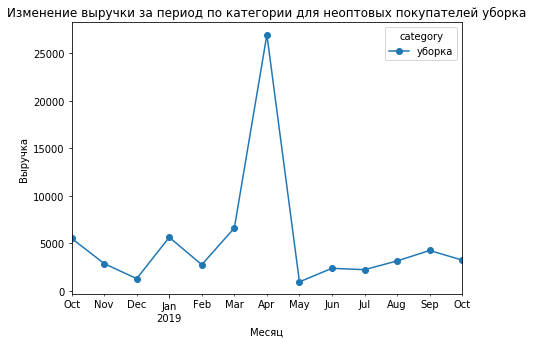

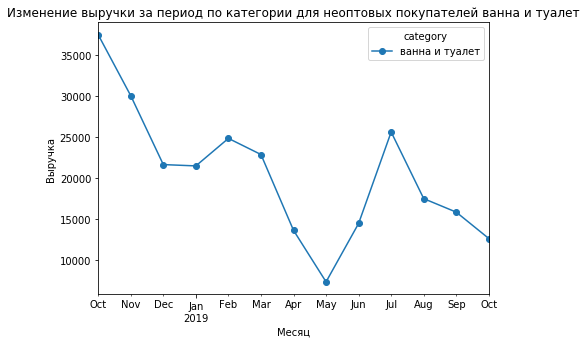

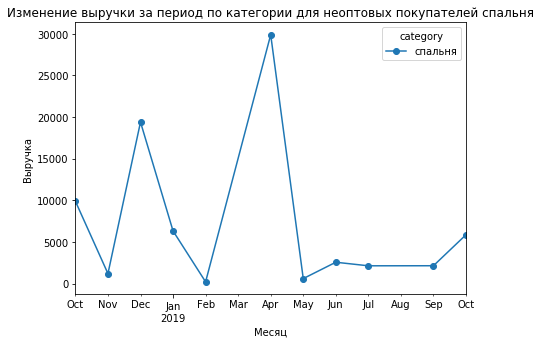

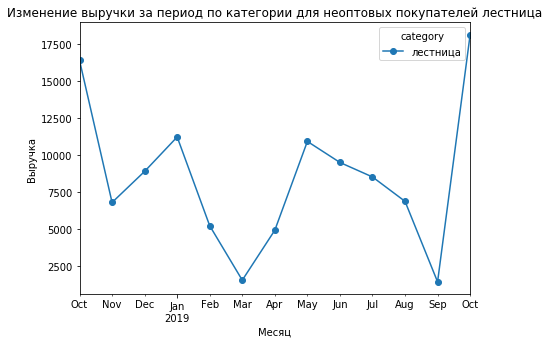

In [42]:
for i in df['category'].unique():
    print()
    df[(df['quantity']<15)&(df['category'] == i)].\
    pivot_table(index='month_year', columns = 'category', values='revenue', aggfunc = 'sum').\
    plot(style='o-', figsize=(7,5))
    plt.xlabel('Месяц')
    plt.ylabel('Выручка')
    plt.title("Изменение выручки за период по категории для неоптовых покупателей "+i)
    plt.show()  

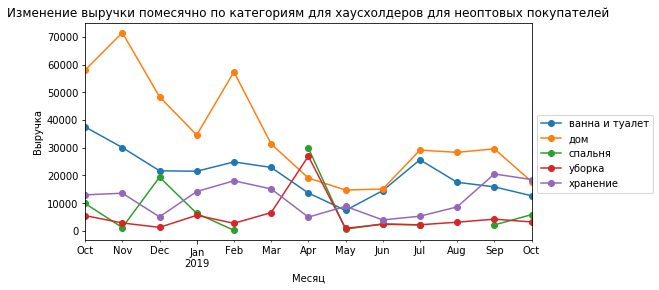

In [43]:
df[(df['quantity']<15)&(df['category']\
                        .isin(['дом','ванна и туалет', 'спальня', 'хранение', 'глажка,сушка,стирка', 'уборка']))]\
.pivot_table(index ='month_year', columns = 'category', values = 'revenue', aggfunc = 'sum')\
.plot(style='o-', figsize=(8,4))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Изменение выручки помесячно по категориям для хаусхолдеров для неоптовых покупателей")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

Можно констатировать, что покупатели разных категорий активизируются(увеличивается выручка) в моменты тесно связанные с укладом нашей жизни, например, как дачники - в апреле-мае. Обращает на себя внимание, что выручка товаров из категории дизайн, в ассортимент которой входят искусственные цветы, повышается в предверии церковных праздников. Лестницы продаются лучше в "ремонтный сезон".

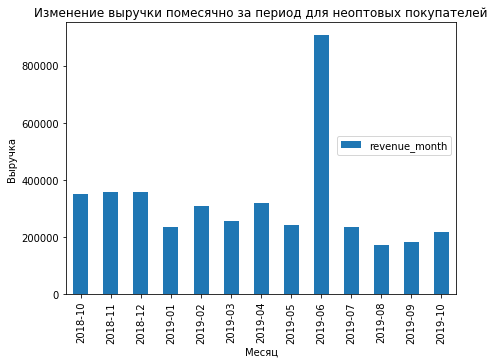

Количество покупателей, выручка за период и c одного покупателятеля помесячно для неоптовых покупателей


month_year  revenue_month  n_customer  revenue_per_user
0     2018-10       351910.0         181       1944.254144
1     2018-11       359348.0         178       2018.808989
2     2018-12       357044.0         238       1500.184874
3     2019-01       235671.0         152       1550.467105
4     2019-02       308055.0         248       1242.157258
..        ...            ...         ...               ...
8     2019-06       906270.0         156       5809.423077
9     2019-07       235410.0         186       1265.645161
10    2019-08       172443.0         166       1038.813253
11    2019-09       181082.0         175       1034.754286
12    2019-10       218027.0         174       1253.028736

[13 rows x 4 columns]

In [44]:
df3 = df.groupby(['month_year']).agg({'revenue':'sum', 'customer_id' : 'nunique'})\
.reset_index().rename(columns={'revenue': 'revenue_month', 'customer_id':'n_customer'})

df3['revenue_per_user'] = df3['revenue_month'] / df3['n_customer']

df3.plot(x= 'month_year', y='revenue_month', kind = 'bar', figsize = (7,5))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Изменение выручки помесячно за период для неоптовых покупателей")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

print('Количество покупателей, выручка за период и c одного покупателятеля помесячно \
для неоптовых покупателей')
df3

<a class="ancor" id="step_13"></a>
#### Для оптовых покупателей

In [45]:
print('Уникальные покупатели:', df[df['quantity']>=15]['customer_id'].nunique())
print('Уникальные заказы:', df[df['quantity']>=15].pivot_table(index=['date_1','order_id'])['revenue'].count())
print('Доля повторных покупок:', (1-df[df['quantity']>=15]['customer_id'].nunique()/\
df[df['quantity']>=15].pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))

print()

for i in df[df['quantity']>=15]['category'].unique():
    print(i)
    print('Уникальные покупатели:', df[(df['quantity']>=15)&(df['category']==i)]['customer_id'].nunique())
    print('Уникальные заказы:', df[(df['quantity']>=15)&(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count())
    print('Доля повторных покупок:', (1-df[(df['quantity']>=15)&(df['category']==i)]['customer_id'].nunique()/\
    df[(df['quantity']>=15)&(df['category']==i)].pivot_table(index=['date_1','order_id'])['revenue'].count()).round(2))
    print()

Уникальные покупатели: 113
Уникальные заказы: 121
Доля повторных покупок: 0.07

хранение
Уникальные покупатели: 18
Уникальные заказы: 18
Доля повторных покупок: 0.0

уборка
Уникальные покупатели: 6
Уникальные заказы: 9
Доля повторных покупок: 0.33

ванна и туалет
Уникальные покупатели: 12
Уникальные заказы: 12
Доля повторных покупок: 0.0

дом
Уникальные покупатели: 29
Уникальные заказы: 30
Доля повторных покупок: 0.03

дизайн
Уникальные покупатели: 39
Уникальные заказы: 40
Доля повторных покупок: 0.03

сумка
Уникальные покупатели: 1
Уникальные заказы: 1
Доля повторных покупок: 0.0

спальня
Уникальные покупатели: 1
Уникальные заказы: 1
Доля повторных покупок: 0.0

растение дом
Уникальные покупатели: 7
Уникальные заказы: 7
Доля повторных покупок: 0.0

растение дача
Уникальные покупатели: 4
Уникальные заказы: 4
Доля повторных покупок: 0.0



Для оптовых покупателей категории "уборка"  порядка 3 клиентов из 9 вернулись за повторными  покупками. Удержание оптовиков по этому профилю может стать одной из стратегий по увеличению выручки.

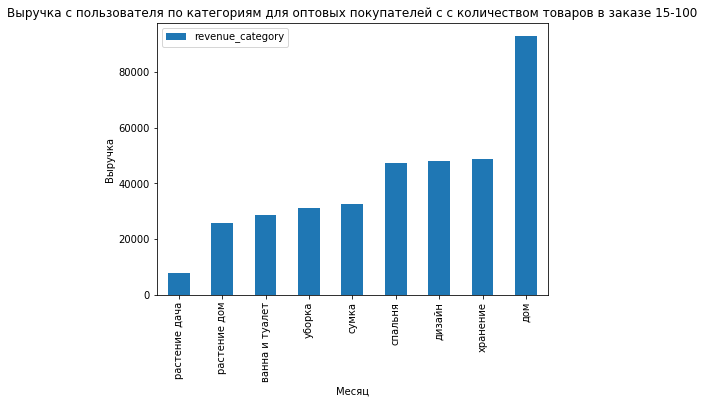

category  revenue_category  n_customer  revenue_per_user
0  ванна и туалет           28725.0           9       3191.666667
1          дизайн           47925.0          36       1331.250000
2             дом           92947.0          26       3574.884615
3   растение дача            7860.0           4       1965.000000
4    растение дом           25818.0           7       3688.285714
5         спальня           47385.0           1      47385.000000
6           сумка           32718.0           1      32718.000000
7          уборка           31105.0           4       7776.250000
8        хранение           48732.0          16       3045.750000

In [46]:
df_category_opt = df[(df['quantity']>=15)&(df['quantity']<100)].groupby(['category'])\
.agg({'revenue':'sum', 'customer_id' : 'nunique'})\
.reset_index().rename(columns={'revenue': 'revenue_category', 'customer_id':'n_customer'})

df_category_opt['revenue_per_user'] = df_category_opt['revenue_category'] / df_category_opt['n_customer']
df_category_opt.sort_values(by='revenue_category')\
.plot(x= 'category', y='revenue_category', kind = 'bar', figsize = (7,5))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Выручка с пользователя по категориям для оптовых покупателей c с количеством товаров в заказе 15-100")
plt.show() 
df_category_opt

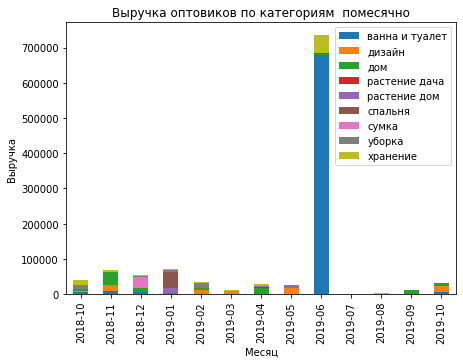

In [47]:
df[(df['quantity']>15)].pivot_table(index='month_year',columns ='category',\
                    values='revenue', aggfunc='sum').plot(kind='bar', figsize=(7,5), stacked = True)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title("Выручка оптовиков по категориям  помесячно")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

In [48]:
df[df['quantity']>=15].groupby('category')\
.agg({'revenue': 'sum', 'product': 'nunique', 'price':['min', 'max', 'mean', 'median'], \
                            'quantity':['min', 'max', 'mean', 'median']})

revenue product   price                               \
                     sum nunique     min     max         mean  median   
category                                                                
ванна и туалет  711325.0       8    19.0   675.0   175.166667    95.5   
дизайн           80155.0      23    19.0   196.0    42.317073    40.0   
дом             105997.0      29    19.0   457.0    79.484848    62.0   
растение дача     7860.0       3    82.0   150.0   103.000000    90.0   
растение дом     25818.0       7    29.0   250.0   127.714286   112.0   
спальня          47385.0       1  1755.0  1755.0  1755.000000  1755.0   
сумка            32718.0       1   574.0   574.0   574.000000   574.0   
уборка           37105.0       7    26.0   550.0   138.363636    64.0   
хранение        101164.0      17    20.0   418.0   120.055556    78.5   

               quantity                           
                    min   max        mean median  
category                                          
ванна и туалет       15  1000  120.000000   23.5  
дизайн               15   300   41.902439   25.0  
дом                  15   200   42.848485   24.0  
растение дача        15    25   19.500000   19.0  
растение дом         15    45   29.571429   25.0  
спальня              27    27   27.000000   27.0  
сумка                57    57   57.000000   57.0  
уборка               15   100   41.545455   30.0  
хранение             15   334   53.722222   27.5

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_14"></a>
## Проверка статистических гипотез

<a class="ancor" id="step_15"></a>
### Гипотеза 1: Среднестатистически средний чек ремонтника-строителя  и  сони не различаются

Н0 - Средний чек с покупателя сегмента "спальня" равна среднему чеку с покупателя сегмента "лестница"                     
Н1 - Средний чек с покупателя сегмента "спальня" и с покупателя сегмента "лестница" различаются

Чтобы проверить гипотезу о равенстве среднего двух выборок средних чеков  по разным сегментам применим scipy.stats.ttest_ind (array1, array2, equal_var).

Для принятия решения об утверждении или отрицании нулевой гипотезы будем использовать критерий уровня значимости p-value. Критический уровень значимости alpha примем 5 %. Если p-value окажется меньше него - отвергнем гипотезу

equal_var (от англ. equal variance, «равная дисперсия») — необязательный параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать) будем проверят тестами Барлетта и Левене

In [49]:
df_1 =df[(df['quantity']<15)&(df['category']=='лестница')]
r1 = df_1.pivot_table(index = 'order_id', values='revenue', aggfunc='sum').reset_index()
r1.columns ={'order_id', 'revenue_per_order'}

df_2=df[(df['quantity']<15)&(df['category']=='спальня')]
r2 = df_2.pivot_table(index = 'order_id', values='revenue', aggfunc='sum').reset_index()
r2.columns ={'order_id', 'revenue_per_order'}

stat, p_1 = bartlett(r1['revenue_per_order'], r2['revenue_per_order'])
print('Тест Барлетта:', p_1)

stat, p = levene(r1['revenue_per_order'], r2['revenue_per_order'])
print('Тест Левене', p)

Тест Барлетта: 0.7772076281782387
Тест Левене 0.9193212526367868


При расчете вероятности для проверки нулевой гипотезы тестами Барлетта и Левене "Дисперсии средних чеков по двум сегментам равны", величины вероятности больше 0,05 для тестов, что указывает на то, дисперсии выборок двух сегментов  не отличаются (равны) и equal_var = True. 

In [50]:
alpha = 0.05

results = st.ttest_ind(r1['revenue_per_order'], r2['revenue_per_order'],equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4423785213922393
Не получилось отвергнуть нулевую гипотезу


p-значение меньше 0.05 (но незначительно),нулевую гипотезу мы отвергаем и принимаем альтернативную гипотезу:"Средний чек с покупателя сегмента "спальня" и с покупателя сегмента "лестница" различаются". Наша гипотеза не подтвердилась.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_16"></a>
### Гипотеза 2: Количество товаров  в заказе хаусхолдера* и растенелюба** различаются

Н0 - Количество товаров покупателя  из категории "растение дача" и "растение дача" (растенелюб) равно количеству товаров покупателя категорий товаров "дом",'ванна и туалет', 'спальня', 'глажка,сушка,стирка', 'уборка' (хаусхолдер)
Н1 - Количество товаров покупателя  из категории "растение дача" и "растение дача" и покупателя категорий товаров "дом",'ванна и туалет', 'спальня', 'глажка,сушка,стирка', 'уборка' различаются

Проверку гипотезы 2 будем осуществлять аналогичным способом, как и гипотезы 1.

In [51]:
df_fl =df[(df['quantity']<15)&(df['category']=='растение дача')|(df['category']=='растение дом')]
r3 = df_fl.pivot_table(index = 'order_id', values='quantity', aggfunc='sum').reset_index()
r3.columns ={'order_id', 'count'}

df_hh=df[(df['quantity']<15)&(df['category']\
                         .isin(['дом', 'ванна и туалет', 'спальня','хранение', 'глажка,сушка,стирка', 'уборка']))]
r4 = df_hh.pivot_table(index = 'order_id', values='quantity', aggfunc='sum').reset_index()
r4.columns ={'order_id', 'count'}


stat, p_1 = bartlett(r3['count'], r3['count'])
print('Тест Барлетта:', p_1)


stat, p = levene(r3['count'], r3['count'])
print('Тест Левене', p)


Тест Барлетта: 1.0
Тест Левене 1.0


При расчете вероятности для проверки нулевой гипотезы тестами Барлетта и Левене "Дисперсии количества товаров в заказе по двум сегментам равны", величины вероятности по тестам большие 0,05, что указывает на то, дисперсии  двух выборок  не отличаются (гомогенны), поэтому и equal_var = True.

In [52]:
alpha = .05

results = st.ttest_ind(r3['count'], r4['count'],equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8408099010942475e-113
Отвергаем нулевую гипотезу


p-значение очень маленькая величина по сравнению с 0.05, поэтому нулевую гипотезу мы отвергаем, и принимаем альтернативную гипотезу:"Количество товаров покупателя  из категории "растение дача" и "растение дом" и покупателя категорий товаров "дом",'ванна и туалет', 'спальня', 'глажка,сушка,стирка', 'уборка' различаются". Наша гипотеза подтвердилась.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_17"></a>
### Гипотеза 3: Количество товаров в заказе хранителя  и домовика не различаются

Н0 - Количество товаров в заказе покупателя  из категории "хранение" и "дом" равны
Н1 - Количество товаров в заказе покупателя  из категории "хранение" и "дом" различаются

Проверку гипотезы 3 будем осуществлять аналогичным способом, как и гипотезы 1.

In [53]:
df_h =df[(df['quantity']<15)&(df['category']=='дом')]
r5 = df_fl.pivot_table(index = 'order_id', values='quantity', aggfunc='sum').reset_index()
r5.columns ={'order_id', 'count'}

df_s=df[(df['quantity']<15)&(df['category']=='хранение')]
r6 = df_hh.pivot_table(index = 'order_id', values='quantity', aggfunc='sum').reset_index()
r6.columns ={'order_id', 'count'}

stat, p_1 = bartlett(r5['count'], r6['count'])
print('Тест Барлетта:', p_1)

stat, p = levene(r5['count'], r6['count'])
print('Тест Левене', p)

Тест Барлетта: 0.0
Тест Левене 6.395032677039145e-121


При расчете вероятности для проверки нулевой гипотезы тестами Барлетта и Левене "Дисперсии количества товаров в заказе по двум сегментам равны", величины вероятностит по тестам меньше 0,05, что указывает на то, дисперсии  двух выборок  гетерогенны, поэтому и equal_var = False.

In [54]:
alpha = .05

results = st.ttest_ind(r5['count'], r6['count'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.48207550367246e-83
Отвергаем нулевую гипотезу


p-значение 0.8 больше 0.05,  нулевую гипотезу  не получилось отвергнуть,  принимаем альтернативную гипотезу. Наша гипотеза не подтвердилась.Количество товаров в заказе хранителя и домовика статистически различны

### Проверка  гипотез с поправкой на множественность гипотез

In [55]:
print('p-значение с поправкой Бонферрони 1,2 и 3 гипотезы ', \
      multipletests([0.3764513738434945, 1.3386692429427733e-22, 4.243522023223665e-21],\
                    alpha = 0.05, method = "bonferroni")[1])
print('p-значение с поправкой Холма 1,2 и 3 гипотезы ', \
      multipletests([0.3764513738434945, 1.3386692429427733e-22, 4.243522023223665e-21], \
                    alpha = 0.05, method = 'holm')[1])


p-значение с поправкой Бонферрони 1,2 и 3 гипотезы  [1.00000000e+00 4.01600773e-22 1.27305661e-20]
p-значение с поправкой Холма 1,2 и 3 гипотезы  [3.76451374e-01 4.01600773e-22 8.48704405e-21]


Мы проверили всего 3 гипотезы, и  в трех случаях приняли альтернативные гипотезы, но в случае гипотезы 1 p-значение было близко к уровню значимости, и есть вероятность ошибочного выбора альтернативной гипотезы.
Если сделать поправку на множественную проверку методом Бонферрони, то нулевую гипотезу в случае  гипотезы 1: "Среднестатистически средний чек ремонтника-строителя и сони не различаются" мы не можем отвергнуть (p -значение больше 0,05 и наши предположения подтверждаются. 
По методу Холма (более актуальном при росте числа гипотез) - остается прежний выбор альтернативной гипотезы при проверке всех 3 гипотез.
Учитывая малое количество гипотез, примем решение, основываясь на поправку по методу Бонферрони

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_18"></a>
# ВЫВОДЫ

Итак, для достижения поставленных целей:  "Выявление профилей покупателей и полноценный анализ товарного ассортимента интернет магазина товаров для дома и дачи "Пока еще все тут" для увеличения выручки магазина" был изучен датасет, описывающий транзакции интернет-магазина за 13 месяцев: 01.010.2018 - 31.10.2019, размеров 6737 строк.

В анализируемых данных пропусков не было, типы данных были представлены корректно,за исключением столбца времени и даты date,  в котором даты были представлены в виде целых чисел каноническим форматом  ггггммддчч. Поэтому был создан дополнительно столбец дат с корректым типом данных. Полных строчных дубликатов не было, но датасет содержал 1864 строк с частичными повторами по дате (при одинаковом номере заказа и других данных), что могло быть критичным при анализе выручки по категориям товаров и сегментацию товаров по количеству и другому признаку (цене, продукту) и исказить выводы по поведению покупателей. Поэтому  из анализируемой таблицы (по согласованию с заказчиком) были удалены все строки с  частичными строчными дубликатами. 

Таким образом, был получен актуальный для целей проекта датасет, который содержал 4873 строки за период 01.010.2018 - 31.10.2019. При этом количество уникальных покупателей  было 2839 , заказов - 2784, продуктов - 2343, что совпадало с иисходным датасетом.

Учитывая относительно небольшое количество ассортиментных позиций,наличие характерных комбинаций в названиях растений, а также четкое понимание областей применения товарного ассортимента товаров для дома и дачи растения было принято категоризацию (сегментацию) товаров "полуручным" методом.

В ходе исследования были проанализирована покупки покупателей и сегментированы товары на основе принадлежности к той или иной товарной категории, сегментированы покупателей, сформулированы и проверены статистические гипотезы.

В итоге:

1. Все товары магазина были  разделены на категории по области применения:
растения:                                                                                                         
-растения дача (растения для выращивания растений на приусадебном участке)                                         
-растения дом (комнатные растения/растения для помещении)
товары для быта и дома:                                                                                           
-стирка, глажка, сушка (приспособления, утварь и аксессуары по назначению)                                                                                           
-ванны и туалет (товары и аксессуары для ванны и туалета, в том числе косметические товары и текстиль по назначению)                                                                                                       
-дизайн (украшения жилья: искусственные имитации цветов и плодов и корнеплодов)                                   
-хранение (мебель, изделия крепежные,  инструменты для мелкого ремонта и аксессуары для хранения)
-уборка (товары, аксессуары и приспособления по назначению)                                                                                
-спальня (текстиль по назначению)                                                                                 
-дом (товары для кухни и придомовой территории),                                                                  
товары для грузоперевозок:                                                                                         
-сумка (сумки-тележки и аксессуары к ним)                                                                          
товары для стройки и ремонта                                                                                      
-лестница (лестницы-стремянки).                                                                                   

2. Было установлено, что 97% пользователей - это "монокатегористы",т.к. покупают товары только из одной категории, и, поэтому сегментировать покупателей  целесообразно исходя категорий  товаров и области его применения и , конечно, долей продаж  товаров данной категории в объеме:                                   
-Растенелюбы (дачники и озеленители)                                                                               
-Наусхолдеры (прачечники,хранители, уборщики, дизайнеры, хранители, чистюли, домовики, сони).                     
-Грузоперевозчики                                                                                                 
-Ремонтники-строители.  

Возможно вынесение дизайнеров отдельно от хаусхолдеров: количество товаров более 2, но низкая цена (и относительно других невысокие объемы продаж).

3. Покупателей с количеством  товара в заказе от 15 и выше (ОПТОВИКИ) следует выделить в отдельный сегмент независимо от категории товара. Привлечение оптовиков и мотивирование их на повторные покупки - одна из возможных стратегий повышения выручки магазина.


4. Каждой из групп покупателей в исследуемый период были характерны свои периоды активных покупок, в частности, у дачников - в апреле-мае,  хаусхолдеры были более активны в ноябре, феврале, апреле. Если спроецировать это на будущее, то  можно предположить, что для обеспечения условно-постоянного объема выручки необходимо учитывать сезонный спрос на товары и искать варианты пополнения ассортимента товарами актуальными в периоды малых продаж остальных.

Обращает на себя внимание тот факт, что  имеющийся ассортимент магазина требует расширения и оптимизации в рамках каждой из категорий, например: в ассортименте присутствуют растения, но нет удобрений, садовых инструментов  и приспособлений, есть цветы и овощи, но нет плодовых деревьев и кустарников. 

Характеристики  количества уникальных товаров, покупателей, заказов, выручки с покупателя, цены, количества товара и количества товаров (минимум, максимум, середина, медиана)  для оптовых и стандартных покупателейприведены в главе 2.4.

5. При поиске закономерностей и совпадений в характеристиках  сегментированных покупателей  были сформулированы и проверены следующие гипотезы:

- Среднестатистически средний чек ремонтника-строителя  и  сони не различаются: подтвердилась
- Количество товарных позиций в заказе хаусхолдера и растенелюба различаются: подтвердилась
- Количество товарных позиций в заказе хранителя и домовика не различаются: не подтвердилась

<a href = '#section1'>Вернуться к оглавлению</a>
</div>